4


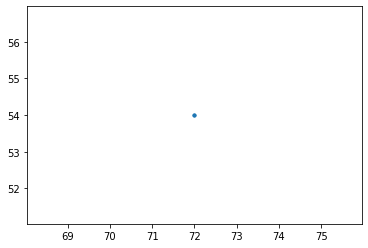

2
2


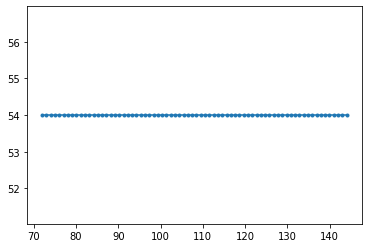

72
74


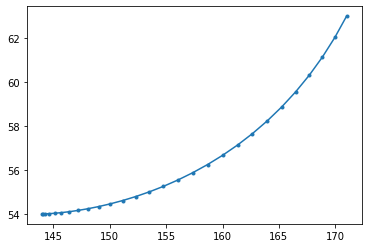

28
102


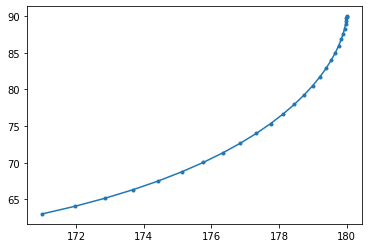

28
130


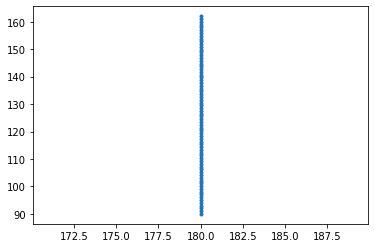

72
202
4


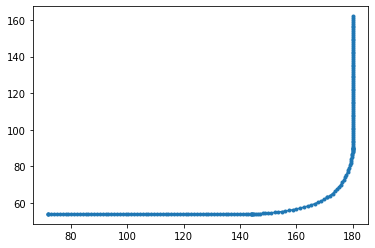

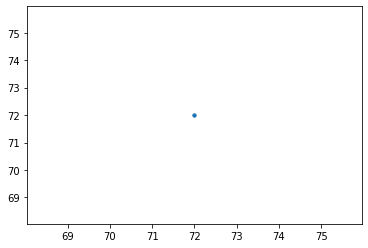

2
2


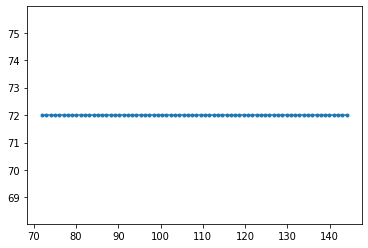

72
74


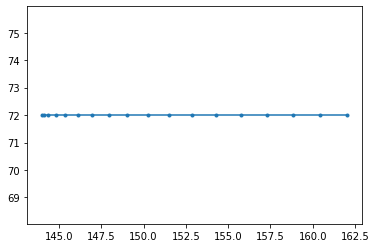

18
92


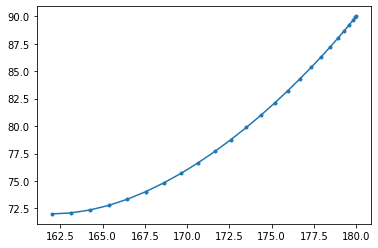

25
117
4


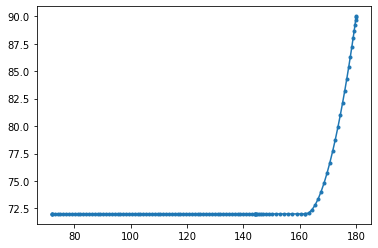

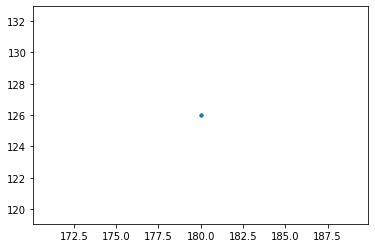

2
2


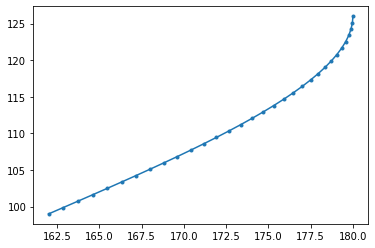

32
34


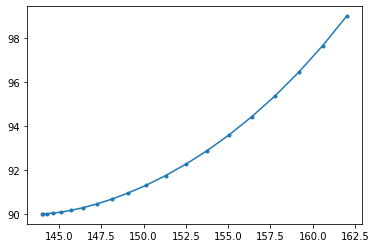

20
54


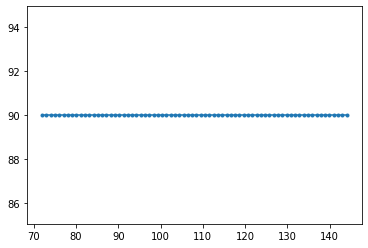

72
126
4


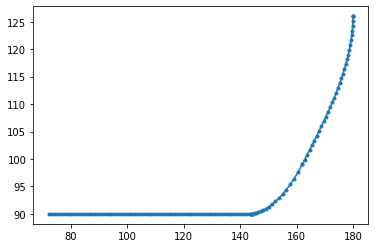

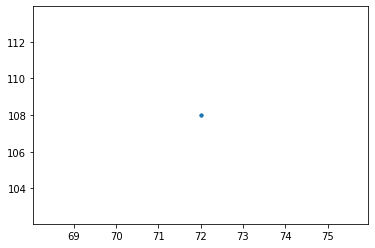

2
2


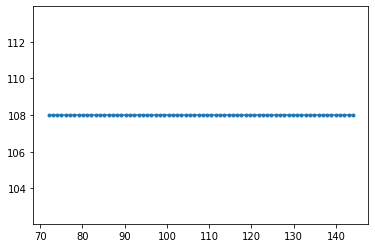

72
74


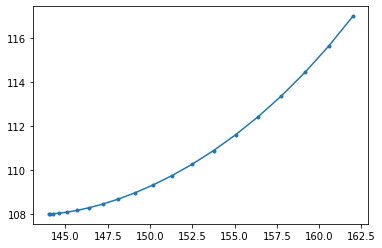

20
94


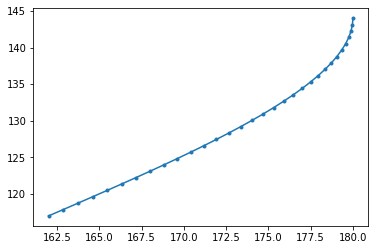

32
126
4


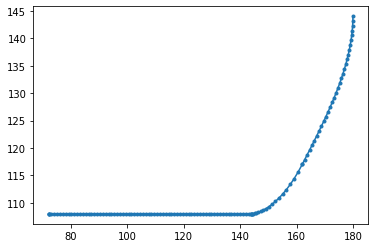

4

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from svg.path import parse_path
from svg.path.path import Line
from xml.dom import minidom

def line_splitter(start, end):
    return (lambda t: (1-t)*start+t*end)

def cubic_bezier_converter(start, control1, control2, end):
    original_data = np.array([start, control1, control2, end])
    cubic_bezier_matrix = np.array([
        [-1,  3, -3,  1],
        [ 3, -6,  3,  0],
        [-3,  3,  0,  0],
        [ 1,  0,  0,  0]
    ])
    return_data = cubic_bezier_matrix.dot(original_data)

    return (lambda t: np.array([t**3, t**2, t, 1]).dot(return_data))

# Learned from
# https://stackoverflow.com/questions/36971363/how-to-interpolate-svg-path-into-a-pixel-coordinates-not-simply-raster-in-pyth


doc = minidom.parse('LaneMap2.svg')
path_strings = [path.getAttribute('d') for path
                in doc.getElementsByTagName('path')]
doc.unlink()

points_np_all=[]
points_np_all=np.empty((len(path_strings)),dtype=object)
print(len(points_np_all))
#points_np_all[k]=np.array([])

for k in range(len(path_strings)):
#for path_string in path_strings:
    path = parse_path(path_strings[k])
    points_np_merge=np.empty((0,2), float)
    #points_np_merge=np.empty(points_np_merge)
    for dat in path:

#path=parse_path(path_strings[block])

#dat=path[key]

        if type(dat).__name__=='CubicBezier':
            start_np = np.array([dat.start.real, dat.start.imag])
            control1_np = np.array([dat.control1.real, dat.control1.imag])
            control2_np = np.array([dat.control2.real, dat.control2.imag])
            end_np = np.array([dat.end.real, dat.end.imag])
            converted_curve = cubic_bezier_converter(start_np, control1_np, control2_np, end_np)
            # 
            diff_np=start_np-end_np
            n_dots=np.round(np.linalg.norm(diff_np)).astype(int)
            # 
            points_np = np.array([converted_curve(t) for t in np.linspace(0, 1, n_dots)])
        elif type(dat).__name__=='Line':
            start_np = np.array([dat.start.real, dat.start.imag])
            end_np = np.array([dat.end.real, dat.end.imag])
            converted_line = line_splitter(start_np,end_np)
            # 
            diff_np=start_np-end_np
            n_dots=np.round(np.linalg.norm(diff_np)).astype(int)
            #     
            points_np=np.array([converted_line(t) for t in np.linspace(0, 1, n_dots)])
        elif type(dat).__name__=='Move':
            # 
            n_dots=1
            # 
            start_np = np.array([dat.start.real, dat.start.imag])
            end_np = np.array([dat.end.real, dat.end.imag])
            points_np = np.array([start_np,end_np])
        else:
            points_np=np.array([])
        #points_np_merge=np.concatenate(points_np_merge,points_np)
        points_np_merge=np.append(points_np_merge, points_np, axis=0)
#         if k==0:
#             points_np_merge=points_np
#         else:
#             points_np_merge=np.append(points_np_merge,points_np,axis=0)
        plt.plot(points_np[:, 0], points_np[:, 1], '.-')
        plt.show()
        print(len(points_np))
        print(len(points_np_merge))
    #points_np_all1=points_np_all1.append(points_np_merge)
    #points_np_all=points_np_merge
    points_np_all[k]= points_np_merge
#     points_np_all=points_np_all.append(points_np_merge)
    print(len(points_np_all))
    plt.plot(points_np_merge[:, 0], points_np_merge[:, 1], '.-')
    plt.show()


len(points_np_all)

In [7]:
n_dots

72.0

In [2]:
len(points_np_all)
for k in range(len(points_np_all)):
    points_np=points_np_all[k]
    plt.plot(points_np[:, 0], points_np[:, 1], '.-')
plt.show()
    

TypeError: 'NoneType' object is not subscriptable